clip-01

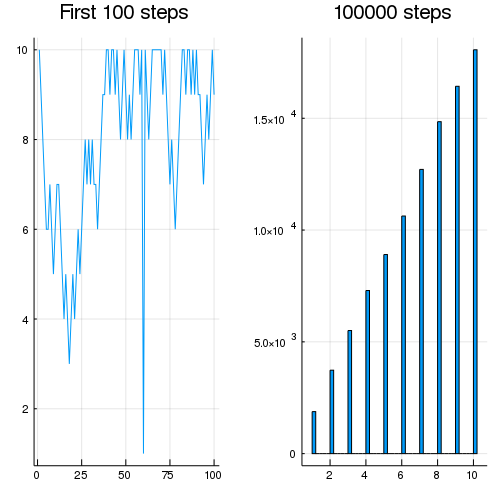

In [1]:
using Distributions, Statistics, StatsPlots

ProjDir = @__DIR__

function generate_walk(N::Int64)
  num_weeks = N
  positions = zeros(Int64, num_weeks);
  current = 10
  d = Uniform(0, 1)

  for i in 1:N
    # Record current position
    positions[i] = current
    # Flip a coin to generate proposal
    proposal = current + sample([-1, 1], 1)[1]
    # Make sure it stays on achipelago
    proposal = proposal < 1  ? 10 : proposal
    proposal = proposal > 10  ? 1 : proposal
    # Move?
    prob_move = proposal/current
    current = rand(d, 1)[1] <  prob_move ? proposal : current

  end

  positions

end

N = 100000
walk = generate_walk(N)

gr()
p1 = plot(walk[1:100], leg=false, title="First 100 steps")
#scatter!(p1, walk[1:100])
p2 = histogram(walk, leg=false, title="$N steps")
plot(p1, p2, layout=(1, 2))
#savefig(joinpath(ProjDir, "Figure 9.3.pdf"))

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*